# Initialization

Training the neural network requires specifying an initial value of the weights. A well chosen initialization method will help learnin by 
- Speeding up the convergence of gradient descent
- Increasing the odds of gradient descent converging to a lower training (and generalization) error 

We use the data set containing blue and red dots and we would build a 3-layer neural network classifier to separate the blue dots from the red dots.

- We will expriment with the following initialization methods :  

- *Zeros initialization* --  setting `initialization = "zeros"` in the input argument.

- *Random initialization* -- setting `initialization = "random"` in the input argument. This initializes the weights to large random values.  

- *He initialization* -- setting `initialization = "he"` in the input argument. This initializes the weights to random values scaled according to a paper by He et al., 2015. 


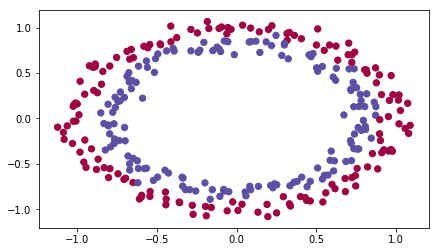

In [1]:
# import Packages
# utility_fns provide various useful functions used in this project.You can find it in useful_fns folder in my repository

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from utility_fns import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from utility_fns import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

##  Neural Network model 

As the focus of the project is experiment with initialization,we will not show how to build a neural network completely from scratch in this notebook. The functions are built in a separate python file utility_fns.
    For details on how the functions are built please refer to https://github.com/rajsiddarth/Image_Classification 

In [2]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
     # to keep track of the loss
    costs = []
    
    # number of examples
    m = X.shape[1] 
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initializing parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # gradient descent

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # ploting the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## Zero initialization

There are two types of parameters to initialize in a neural network:
- the weight matrices $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- the bias vectors $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$


In [3]:
def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    # number of layers in the network
    L = len(layers_dims)            
    
    for l in range(1, L):
        
        parameters['W' + str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
       
    return parameters

The following code to trains the model on 15,000 iterations using zeros initialization.

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


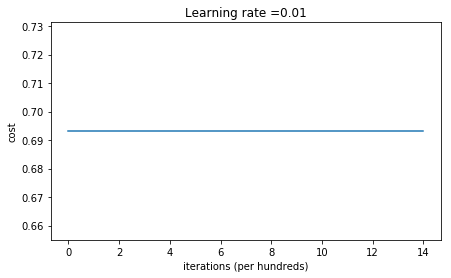

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [4]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The performance is really bad, and the cost does not really decrease, and the algorithm performs no better than random guessing.
This is beacause the model is predicting 0 for every example. 

In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing, and you might as well be training a neural network with $n^{[l]}=1$ for every layer, and the network is no more powerful than a linear classifier such as logistic regression. 

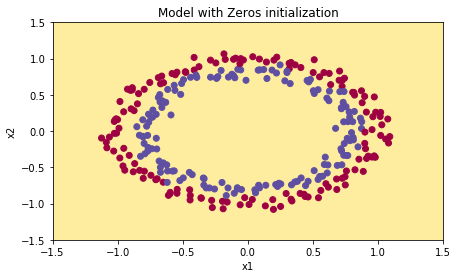

In [5]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## Random initialization

We will now intialize the weights randomly. Following random initialization, each neuron can then proceed to learn a different function of its inputs. 

In [6]:
def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(123)               
    parameters = {}
     # integer representing the number of layers
    L = len(layers_dims)           
    
    for l in range(1, L):
      
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*10
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        

    return parameters

The following code trains the model on 15,000 iterations using random initialization.

C:\Users\sid\utility_fns.py:15: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))
C:\Users\sid\utility_fns.py:141: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\sid\utility_fns.py:141: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 1.300957102192743
Cost after iteration 2000: 0.7689172724669893
Cost after iteration 3000: 0.6088672146025373
Cost after iteration 4000: 0.6339951614381886
Cost after iteration 5000: 0.49133526320382526
Cost after iteration 6000: 0.510080445065304
Cost after iteration 7000: 0.5254447894967321
Cost after iteration 8000: 0.48015338448455813
Cost after iteration 9000: 0.511132098719909
Cost after iteration 10000: 0.5013177542163428
Cost after iteration 11000: 0.4914872479086817
Cost after iteration 12000: 0.4868182603066754
Cost after iteration 13000: 0.4897089322393321
Cost after iteration 14000: 0.4718132153615703


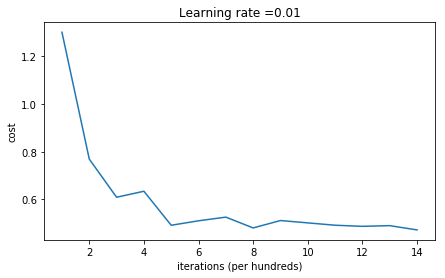

On the train set:
Accuracy: 0.72
On the test set:
Accuracy: 0.73


In [7]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

- The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that are very close to 0 or 1 for some examples, and when it gets that example wrong it incurs a very high loss for that example. Indeed, when $\log(a^{[3]}) = \log(0)$, the loss goes to infinity.

- Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm. 

- If we train this network longer we will see better results, but initializing with overly large random numbers slows down the optimization.


C:\Users\sid\utility_fns.py:15: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


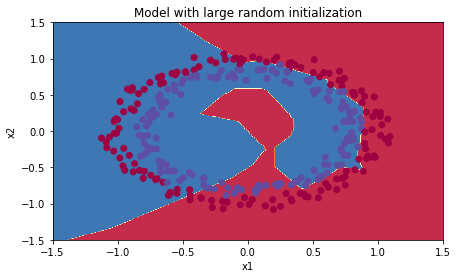

In [8]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

##  He initialization

 "He Initialization" is named for the first author of He et al., 2015. (this is similar to Xavier initialization except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` where He initialization would use `sqrt(2./layers_dims[l-1])`.)


In [9]:
def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(123)
    parameters = {}
    # integer representing the number of layers
    L = len(layers_dims) - 1 
     
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
     
        
    return parameters

The following code trains the model on 15,000 iterations using He initialization.

Cost after iteration 0: 0.7389547156151755
Cost after iteration 1000: 0.6765966495618397
Cost after iteration 2000: 0.658949590316499
Cost after iteration 3000: 0.6280909555200329
Cost after iteration 4000: 0.5719894201234069
Cost after iteration 5000: 0.49439004673004405
Cost after iteration 6000: 0.40066524012156984
Cost after iteration 7000: 0.318388171946054
Cost after iteration 8000: 0.25024429562719386
Cost after iteration 9000: 0.19485995745964355
Cost after iteration 10000: 0.15277267577345585
Cost after iteration 11000: 0.1272855766458968
Cost after iteration 12000: 0.10936995457234631
Cost after iteration 13000: 0.09582923566604595
Cost after iteration 14000: 0.08536606858789356


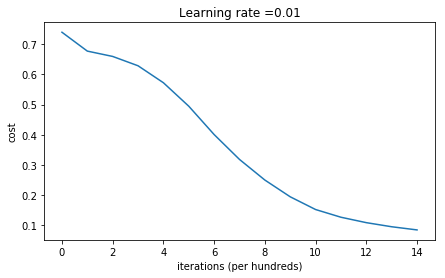

On the train set:
Accuracy: 0.986666666667
On the test set:
Accuracy: 0.94


In [10]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

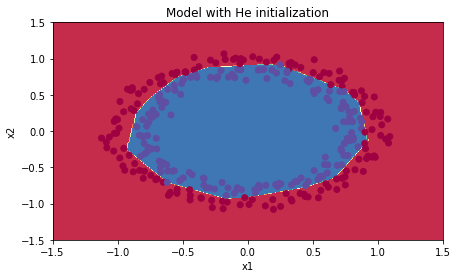

In [11]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

- The model with He initialization separates the blue and the red dots very well in a small number of iterations.

# Conclusions

Important notes:

- Different initializations lead to different results
- Random initialization is used to break symmetry and make sure different hidden units can learn different things
- Don't intialize to values that are too large
- He initialization works well for networks with ReLU activations. 

References:

- The framework is based upon the assignments in Improving Deep Neural Nets course by Andrew Ng in Coursera